<a href="https://colab.research.google.com/github/IvanCampos11/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/module2-Train/LS_DS_432_Train_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [10]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

In [11]:
def load_quickdraw10(path):
  data = np.load(path)
  X = data['arr_0']
  y = data['arr_1']
  X, y = shuffle(X, y)


  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

  return X_train, y_train, X_test, y_test

In [12]:
X_train, y_train, X_test, y_test = load_quickdraw10('quickdraw10.npz')

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [14]:
##### Your Code Here #####

def create_model(lr=.01):
  opt = SGD(learning_rate=lr)

  model = Sequential(
      [
       Dense(32, activation='relu', input_dim=784),
       Dense(32, activation='relu'),
       Dense(10, activation='softmax')       
      ]
)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [15]:
quickdraw_model = create_model()

In [16]:
quickdraw_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [17]:
quickdraw_model_32 = create_model()

bt_default = quickdraw_model_32.fit(X_train, y_train,
                                epochs=25,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/25
2500/2500 [==============================] - 5s 2ms/step - loss: 28.9007 - accuracy: 0.0988 - val_loss: 2.3332 - val_accuracy: 0.1000
Epoch 2/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3146 - accuracy: 0.1007 - val_loss: 2.3222 - val_accuracy: 0.0966
Epoch 3/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3026 - accuracy: 0.0984 - val_loss: 2.3221 - val_accuracy: 0.0985
Epoch 4/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3026 - accuracy: 0.0997 - val_loss: 2.3221 - val_accuracy: 0.0966
Epoch 5/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3026 - accuracy: 0.0995 - val_loss: 2.3220 - val_accuracy: 0.0985
Epoch 6/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3026 - accuracy: 0.0991 - val_loss: 2.3220 - val_accuracy: 0.1009
Epoch 7/25
2500/2500 [==============================] - 6s 2ms/step - loss: 2.3026 - accuracy: 0.0987 - val_loss: 2.3221 - val_accuracy

In [23]:
quickdraw_model_8 = create_model()

bt_8 = quickdraw_model_8.fit(X_train, y_train,
                                epochs=25,
                                batch_size=8,
                                validation_data=(X_test, y_test))

Epoch 1/25
10000/10000 [==============================] - 20s 2ms/step - loss: 12.9347 - accuracy: 0.0979 - val_loss: 2.3265 - val_accuracy: 0.1001
Epoch 2/25
10000/10000 [==============================] - 21s 2ms/step - loss: 2.6564 - accuracy: 0.0987 - val_loss: 2.3269 - val_accuracy: 0.0983
Epoch 3/25
10000/10000 [==============================] - 22s 2ms/step - loss: 2.3029 - accuracy: 0.0996 - val_loss: 2.3266 - val_accuracy: 0.0966
Epoch 4/25
10000/10000 [==============================] - 20s 2ms/step - loss: 2.3029 - accuracy: 0.1002 - val_loss: 2.3267 - val_accuracy: 0.0984
Epoch 5/25
10000/10000 [==============================] - 20s 2ms/step - loss: 2.3028 - accuracy: 0.1011 - val_loss: 2.3265 - val_accuracy: 0.1000
Epoch 6/25
10000/10000 [==============================] - 21s 2ms/step - loss: 2.3029 - accuracy: 0.0988 - val_loss: 2.3265 - val_accuracy: 0.0984
Epoch 7/25
10000/10000 [==============================] - 20s 2ms/step - loss: 2.3028 - accuracy: 0.1011 - val_loss: 

In [24]:
quickdraw_model_16 = create_model()

bt_16 = quickdraw_model_16.fit(X_train, y_train,
                                epochs=25,
                                batch_size=16,
                                validation_data=(X_test, y_test))

Epoch 1/25
5000/5000 [==============================] - 11s 2ms/step - loss: 3.0887 - accuracy: 0.0975 - val_loss: 2.3065 - val_accuracy: 0.0983
Epoch 2/25
5000/5000 [==============================] - 10s 2ms/step - loss: 2.3042 - accuracy: 0.0994 - val_loss: 2.3053 - val_accuracy: 0.0984
Epoch 3/25
5000/5000 [==============================] - 10s 2ms/step - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3054 - val_accuracy: 0.0966
Epoch 4/25
5000/5000 [==============================] - 11s 2ms/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3054 - val_accuracy: 0.0984
Epoch 5/25
5000/5000 [==============================] - 10s 2ms/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3050 - val_accuracy: 0.1015
Epoch 6/25
5000/5000 [==============================] - 10s 2ms/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3051 - val_accuracy: 0.1001
Epoch 7/25
5000/5000 [==============================] - 10s 2ms/step - loss: 2.3026 - accuracy: 0.0997 - val_loss: 2.3050 - val_ac

In [25]:
quickdraw_model_512 = create_model()

bt_512 = quickdraw_model_512.fit(X_train, y_train,
                                epochs=25,
                                batch_size=512,
                                validation_data=(X_test, y_test))

Epoch 1/25
157/157 [==============================] - 1s 4ms/step - loss: 45.4643 - accuracy: 0.1001 - val_loss: 2.3053 - val_accuracy: 0.0966
Epoch 2/25
157/157 [==============================] - 0s 3ms/step - loss: 2.3045 - accuracy: 0.1009 - val_loss: 2.3053 - val_accuracy: 0.0966
Epoch 3/25
157/157 [==============================] - 0s 3ms/step - loss: 2.3032 - accuracy: 0.1009 - val_loss: 2.3053 - val_accuracy: 0.0966
Epoch 4/25
157/157 [==============================] - 0s 3ms/step - loss: 2.3034 - accuracy: 0.1009 - val_loss: 2.3053 - val_accuracy: 0.0966
Epoch 5/25
157/157 [==============================] - 0s 3ms/step - loss: 2.3033 - accuracy: 0.1009 - val_loss: 2.3053 - val_accuracy: 0.0966
Epoch 6/25
157/157 [==============================] - 0s 3ms/step - loss: 2.3031 - accuracy: 0.1009 - val_loss: 2.3054 - val_accuracy: 0.0966
Epoch 7/25
157/157 [==============================] - 0s 3ms/step - loss: 2.3029 - accuracy: 0.1009 - val_loss: 2.3054 - val_accuracy: 0.0966
Epoch

In [26]:
quickdraw_model_64 = create_model()

bt_64 = quickdraw_model_64.fit(X_train, y_train,
                                epochs=25,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/25
2500/2500 [==============================] - 5s 2ms/step - loss: 14.9168 - accuracy: 0.1013 - val_loss: 2.3410 - val_accuracy: 0.1009
Epoch 2/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0969 - val_loss: 2.3441 - val_accuracy: 0.0984
Epoch 3/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3449 - val_accuracy: 0.1001
Epoch 4/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3026 - accuracy: 0.0989 - val_loss: 2.3471 - val_accuracy: 0.0983
Epoch 5/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3026 - accuracy: 0.0986 - val_loss: 2.3474 - val_accuracy: 0.0984
Epoch 6/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3026 - accuracy: 0.0989 - val_loss: 2.3475 - val_accuracy: 0.0985
Epoch 7/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3026 - accuracy: 0.1008 - val_loss: 2.3477 - val_accuracy

In [27]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([bt_default, bt_8, bt_512, bt_64, bt_16], ["32_", "8_", "512_", "64_", "16_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Batch Size'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,11.698858,0.100600,2.306777,0.09835,0,32_
1,2.346596,0.100150,2.306756,0.09835,1,32_
2,2.302738,0.100000,2.306798,0.10000,2,32_
3,2.302564,0.100138,2.306722,0.09660,3,32_
4,2.302556,0.098937,2.306662,0.09660,4,32_


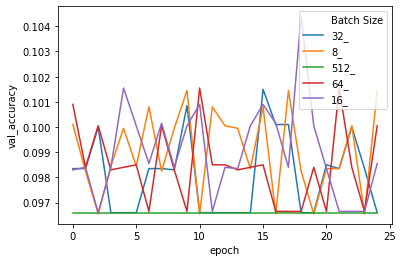

In [28]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

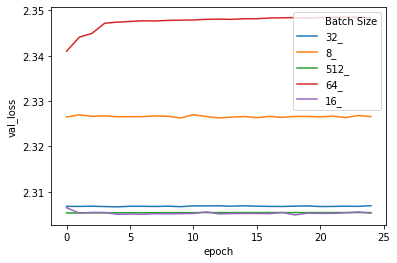

In [29]:
sns.lineplot(x='epoch', y='val_loss', hue='Batch Size', data=df);

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [30]:
lr_default = create_model().fit(X_train, y_train,
                                epochs=25,
                                validation_data=(X_test,y_test)
)

Epoch 1/25
2500/2500 [==============================] - 5s 2ms/step - loss: 4.6246 - accuracy: 0.0999 - val_loss: 2.3088 - val_accuracy: 0.0966
Epoch 2/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3029 - accuracy: 0.1006 - val_loss: 2.3080 - val_accuracy: 0.0983
Epoch 3/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3026 - accuracy: 0.0971 - val_loss: 2.3081 - val_accuracy: 0.0966
Epoch 4/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3026 - accuracy: 0.0983 - val_loss: 2.3081 - val_accuracy: 0.0966
Epoch 5/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3026 - accuracy: 0.0989 - val_loss: 2.3081 - val_accuracy: 0.0966
Epoch 6/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3026 - accuracy: 0.0995 - val_loss: 2.3082 - val_accuracy: 0.0985
Epoch 7/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3026 - accuracy: 0.0989 - val_loss: 2.3082 - val_accuracy:

In [31]:
lr_75 = create_model(lr=.75).fit(X_train, y_train,
                                epochs=25,
                                validation_data=(X_test,y_test)
)

Epoch 1/25
2500/2500 [==============================] - 5s 2ms/step - loss: 46572297485549568.0000 - accuracy: 0.1005 - val_loss: 2.3092 - val_accuracy: 0.0984
Epoch 2/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3081 - accuracy: 0.1026 - val_loss: 2.3082 - val_accuracy: 0.1001
Epoch 3/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3079 - accuracy: 0.0998 - val_loss: 2.3114 - val_accuracy: 0.0984
Epoch 4/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3081 - accuracy: 0.0989 - val_loss: 2.3124 - val_accuracy: 0.1044
Epoch 5/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3079 - accuracy: 0.1016 - val_loss: 2.3062 - val_accuracy: 0.0983
Epoch 6/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3080 - accuracy: 0.0998 - val_loss: 2.3065 - val_accuracy: 0.0966
Epoch 7/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3080 - accuracy: 0.1011 - val_loss: 2.3062

In [32]:
lr_0001 = create_model(lr=.0001).fit(X_train, y_train,
                                epochs=25,
                                validation_data=(X_test,y_test)
)

Epoch 1/25
2500/2500 [==============================] - 5s 2ms/step - loss: 3.6906 - accuracy: 0.2084 - val_loss: 2.1551 - val_accuracy: 0.2277
Epoch 2/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.0929 - accuracy: 0.2462 - val_loss: 2.0338 - val_accuracy: 0.2589
Epoch 3/25
2500/2500 [==============================] - 5s 2ms/step - loss: 1.9872 - accuracy: 0.2814 - val_loss: 1.9537 - val_accuracy: 0.3047
Epoch 4/25
2500/2500 [==============================] - 5s 2ms/step - loss: 1.9140 - accuracy: 0.3144 - val_loss: 1.8971 - val_accuracy: 0.3264
Epoch 5/25
2500/2500 [==============================] - 5s 2ms/step - loss: 1.8568 - accuracy: 0.3339 - val_loss: 1.8500 - val_accuracy: 0.3430
Epoch 6/25
2500/2500 [==============================] - 5s 2ms/step - loss: 1.8094 - accuracy: 0.3514 - val_loss: 1.8103 - val_accuracy: 0.3602
Epoch 7/25
2500/2500 [==============================] - 5s 2ms/step - loss: 1.7665 - accuracy: 0.3695 - val_loss: 1.7736 - val_accuracy:

In [33]:
lr_default = create_model(lr=1.0).fit(X_train, y_train,
                                epochs=25,
                                validation_data=(X_test,y_test)
)

Epoch 1/25
2500/2500 [==============================] - 5s 2ms/step - loss: 128860620324864.0000 - accuracy: 0.1011 - val_loss: 2.3112 - val_accuracy: 0.1000
Epoch 2/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3100 - accuracy: 0.1009 - val_loss: 2.3084 - val_accuracy: 0.1015
Epoch 3/25
2500/2500 [==============================] - 6s 2ms/step - loss: 2.3103 - accuracy: 0.0997 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 4/25
2500/2500 [==============================] - 6s 2ms/step - loss: 2.3098 - accuracy: 0.1005 - val_loss: 2.3090 - val_accuracy: 0.1008
Epoch 5/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3103 - accuracy: 0.0997 - val_loss: 2.3047 - val_accuracy: 0.0984
Epoch 6/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3099 - accuracy: 0.1014 - val_loss: 2.3045 - val_accuracy: 0.1018
Epoch 7/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3097 - accuracy: 0.1018 - val_loss: 2.3050 -

In [34]:
lr_default = create_model(lr=.001).fit(X_train, y_train,
                                epochs=25,
                                validation_data=(X_test,y_test)
)

Epoch 1/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.0962 - accuracy: 0.3295 - val_loss: 1.6891 - val_accuracy: 0.4185
Epoch 2/25
2500/2500 [==============================] - 5s 2ms/step - loss: 1.6101 - accuracy: 0.4436 - val_loss: 1.5418 - val_accuracy: 0.4660
Epoch 3/25
2500/2500 [==============================] - 5s 2ms/step - loss: 1.4691 - accuracy: 0.4877 - val_loss: 1.4402 - val_accuracy: 0.4963
Epoch 4/25
2500/2500 [==============================] - 5s 2ms/step - loss: 1.3512 - accuracy: 0.5330 - val_loss: 1.3435 - val_accuracy: 0.5275
Epoch 5/25
2500/2500 [==============================] - 5s 2ms/step - loss: 1.2776 - accuracy: 0.5627 - val_loss: 1.2694 - val_accuracy: 0.5807
Epoch 6/25
2500/2500 [==============================] - 5s 2ms/step - loss: 1.2182 - accuracy: 0.5903 - val_loss: 1.2259 - val_accuracy: 0.6029
Epoch 7/25
2500/2500 [==============================] - 5s 2ms/step - loss: 1.1680 - accuracy: 0.6100 - val_loss: 1.1883 - val_accuracy:

In [ ]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([lr_default, lr_0001, lr_75, lr], [".01_", ".0001_", ".75_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Learning Rate'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
Your answer goes here.
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


